In [279]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat, unumpy
from pylab import rcParams
%matplotlib inline

In [280]:
D = 1.2e-15
L = 1/10000
M_vec = []
times = range(100000)

In [281]:
for a in range(5,50,5):
    M = []
    for t in times:
        S = np.zeros(a)
        for n in range(a):
            S[n] = (1/((2*(n)+1)**2))*np.exp(((-D)*((2*(n)+1)**2)*(np.pi**2)*(t))/L**2)
        M.append(1-((8/np.pi**2)*np.sum(S)))
    M_vec.append(M)

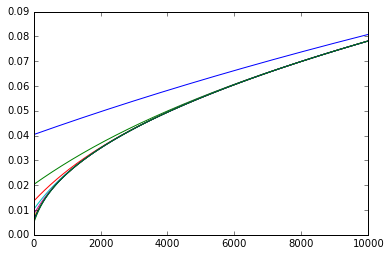

In [282]:
plt.plot(times[0:10000], np.transpose(M_vec)[0:10000])
plt.show()

In [283]:
def Diffusion(times, D):
    a = 40
    L = 1/10000
    M = []
    
    for t in times:
        S = np.zeros(a)
        for n in range(a):
            S[n] = (1/((2*(n)+1)**2))*np.exp(((-D)*((2*(n)+1)**2)*(np.pi**2)*(t))/L**2)
        M.append((1-((8/np.pi**2)*np.sum(S))))
    return M

In [284]:
x_float = np.array([ufloat(2, 0.01), ufloat(4, 0.01), ufloat(8, 0.01), ufloat(24, 0.01), ufloat(48, 0.01), ufloat(72, 0.01), 
              ufloat(96, 0.01), ufloat(120, 0.01), ufloat(144, 0.01), ufloat(168, 0.01)])
x_float *= 3600
y_float = np.array([ufloat(0.081102667, 0.140473939), ufloat(0.596991, 0.691533728), ufloat(4.666506, 5.134847695), ufloat(14.83437333, 11.47135166), 
              ufloat(23.223108, 11.58948278), ufloat(29.575486, 8.516454673), ufloat(32.873329, 4.956499587), ufloat(33.08912267, 4.654565199), 
              ufloat(33.24061033, 4.785973839), ufloat(33.49927467, 5.021521431)])
y_float /= 100
x = unumpy.nominal_values(x_float)
y = unumpy.nominal_values(y_float)

x_err = unumpy.std_devs(x_float)
y_err = unumpy.std_devs(y_float)

print(x)
print(y)
print(x_err)
print(y_err)



[   7200.   14400.   28800.   86400.  172800.  259200.  345600.  432000.
  518400.  604800.]
[ 0.00081103  0.00596991  0.04666506  0.14834373  0.23223108  0.29575486
  0.32873329  0.33089123  0.3324061   0.33499275]
[ 36.  36.  36.  36.  36.  36.  36.  36.  36.  36.]
[ 0.00140474  0.00691534  0.05134848  0.11471352  0.11589483  0.08516455
  0.049565    0.04654565  0.04785974  0.05021521]


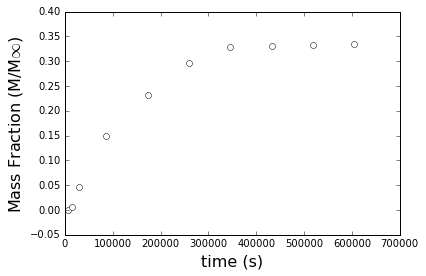

In [285]:
plt.ylabel('Mass Fraction (M/M$\infty$)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
#rcParams['figure.figsize'] = 10, 10
plt.errorbar(x, y, fmt = 'wo', yerr = y_err)
#plt.plot(x,y)
plt.show()

In [286]:
D_opt = curve_fit(Diffusion, x, y, p0=1.2e-15)

In [287]:
print (D_opt)

(array([  4.71375896e-16]), array([[  2.17090411e-33]]))


In [288]:
D = D_opt[0]
variance = D_opt[1]
sigma = np.sqrt(variance)
print(sigma)
a = 40
L = 1/10000
M = []
times = range(0, 600000, 100)

for t in times:
        S = np.zeros(a)
        for n in range(a):
            S[n] = (1/((2*(n)+1)**2))*np.exp(((-D)*((2*(n)+1)**2)*(np.pi**2)*(t))/L**2)
        M.append(1-((8/np.pi**2)*np.sum(S)))

[[  4.65929621e-17]]


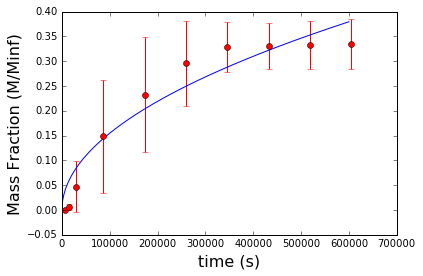

In [289]:
plt.plot(times, M)
plt.ylabel('Mass Fraction (M/Minf)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.errorbar(x, y, fmt = 'ro', yerr = y_err)
#plt.plot(x, y)
plt.show()

In [290]:
x = np.array([ufloat(10, 0.1), ufloat(15, 0.2)])

In [291]:
y = unumpy.std_devs(x)
z = unumpy.nominal_values(x)

In [292]:
print (y)
print (z)

[ 0.1  0.2]
[ 10.  15.]
